In [1]:
# data imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
# clustering imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans
# classification imports
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# warnings imports
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np

In [5]:
path = 'yelp_data/health_text_sentiment_full.csv'

In [6]:
ls yelp_data/

health_text_model_results.csv*  health_text_sentiment_full.csv*
health_text_sentiment.csv*      sms.tsv*


In [7]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df[['stars','clean_text']]

In [8]:
df.head()

,stars,clean_text
0,1,please stay away place bad care imaginable sta...
1,5,husband patient dr byrne last year half last m...
2,4,dr byrne great doctor great bed side manner ex...
3,3,raise review dr bryne receptive daughter go an...
4,1,wish could give star bad office ever horrible ...


In [9]:
data = df.copy()

In [ ]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data = data.reset_index(drop=True)

In [10]:
data.head()

,stars,clean_text
0,1,please stay away place bad care imaginable sta...
1,5,husband patient dr byrne last year half last m...
2,4,dr byrne great doctor great bed side manner ex...
3,3,raise review dr bryne receptive daughter go an...
4,1,wish could give star bad office ever horrible ...


In [ ]:
data.stars.value_counts()

## Vizualize

In [11]:
%%time
from sklearn.decomposition import PCA
pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),])


X = pipeline.fit_transform(data.clean_text).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

CPU times: user 5min, sys: 6min 49s, total: 11min 50s
Wall time: 6min 29s


In [13]:
data2D

array([[ 0.2116576 , -0.11213621],
       [-0.02452284, -0.10468861],
       [-0.10016853,  0.086914  ],
       ...,
       [-0.10387841,  0.03114669],
       [-0.06767988, -0.07675747],
       [-0.08674574, -0.03324328]])

In [14]:
frame = pd.DataFrame({'x':data2D[:,0], 'y':data2D[:,1],'stars':data.stars})

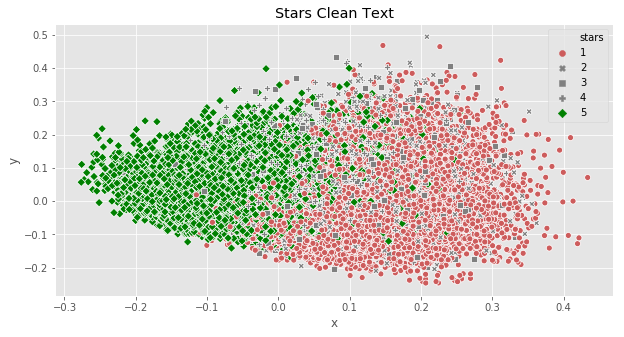

In [20]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="x", y="y", hue="stars",style='stars' ,data=frame,
                     palette={1: "indianred", 
                              2:'gray',
                              3:'gray',
                              4:'gray',
                              5: "green"})
plt.legend()
plt.title('Stars Clean Text')
plt.show()

## Original Text

In [24]:
df2 = pd.read_csv(path)
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
df2 = df2[['stars','text']]
df2.head()

,stars,text
0,1,Please stay away from this place if you can! I...
1,5,My husband has been a patient of Dr. Byrne for...
2,4,Dr. Byrne is a great doctor! She has great bed...
3,3,I'm raising my review as Dr Bryne's has been m...
4,1,I wish I could give 0 stars. Worst office I've...


In [25]:
%%time
from sklearn.decomposition import PCA
pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),])


X = pipeline.fit_transform(df2.text).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

CPU times: user 7min 35s, sys: 14min 43s, total: 22min 19s
Wall time: 13min 39s


In [26]:
frame2 = pd.DataFrame({'x':data2D[:,0], 'y':data2D[:,1],'stars':df2.stars})

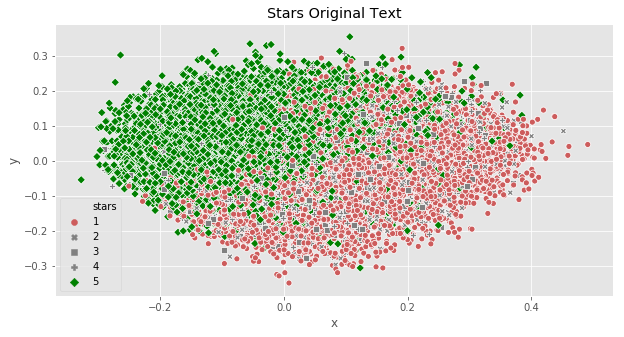

In [27]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="x", y="y", hue="stars",style='stars' ,data=frame2,
                     palette={1: "indianred", 
                              2:'gray',
                              3:'gray',
                              4:'gray',
                              5: "green"})
plt.legend()
plt.title('Stars Original Text')
plt.show()